<a href="https://colab.research.google.com/github/Dsasank81/Coding-Raja-Task-1-2-/blob/main/HEX%C2%A0SOFTWARES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-1-94983c666abe>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette="viridis")


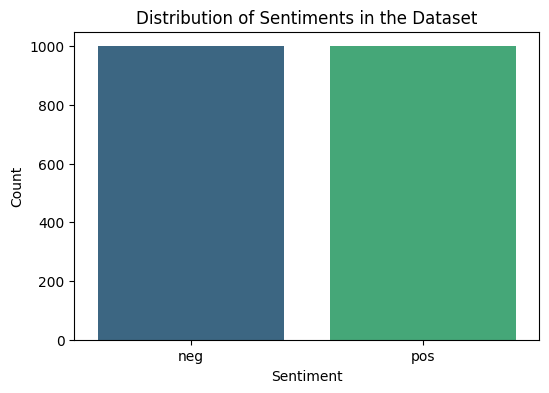

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

         neg       0.79      0.84      0.81       199
         pos       0.83      0.78      0.81       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



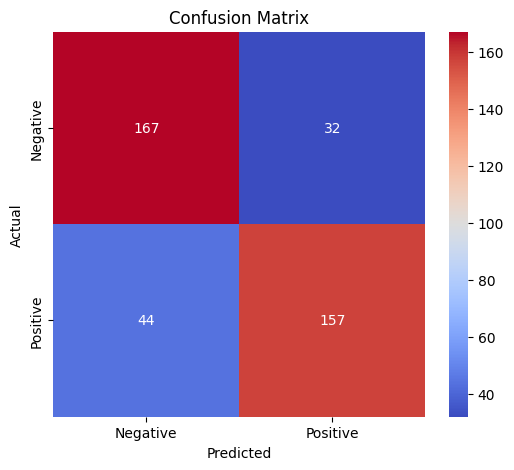

In [ ]:
# Assignment -1 (Sentiment Analysis)
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download necessary nltk resources
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Step 1: Load the dataset
from nltk.corpus import movie_reviews
docs = [(list(movie_reviews.words(fileid)), category)
        for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids(category)]
df = pd.DataFrame(docs, columns=["review", "sentiment"])
df['review'] = df['review'].apply(lambda x: ' '.join(x))

# Step 2: Data Visualization - Distribution of Sentiments
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette="viridis")
plt.title("Distribution of Sentiments in the Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Step 3: Preprocess the data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['cleaned_review'] = df['review'].apply(preprocess_text)

# Step 4: Split the data
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Vectorize the text data
vectorizer = CountVectorizer(max_features=5000)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Step 6: Train the model
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test_vectors)

# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Download the movie_reviews dataset
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357273 sha256=0d3b86a2ba372e264117c0e2a5beb40cd56265789399fbe96857364db75c6fa7
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


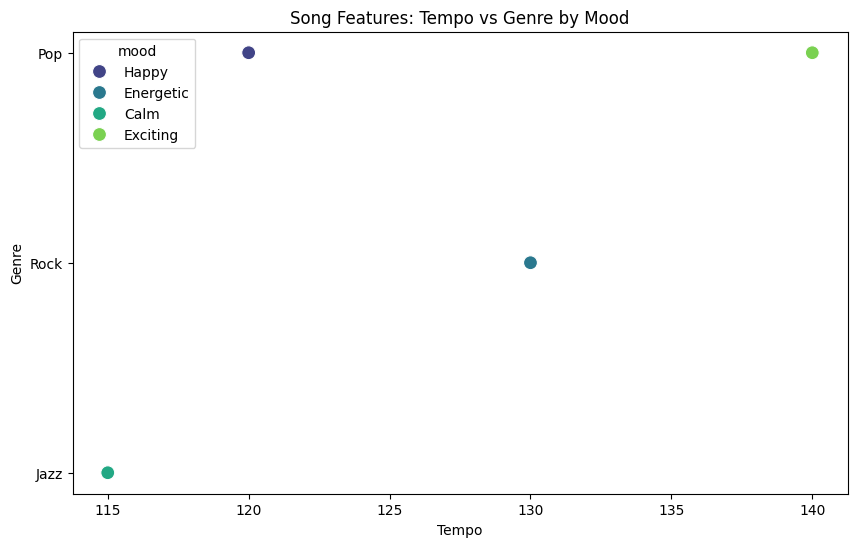

RMSE: 1.3356
Recommended songs based on content:
   song_id  tempo genre   mood
0       10    120   Pop  Happy
Hybrid Recommendations:
Empty DataFrame
Columns: [song_id, tempo, genre, mood]
Index: []


In [ ]:
# Assignment-2 Music Recomendation System

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Assume you have a dataset of user-song interactions and song features
# Here we create a sample dataset for demonstration purposes
data = {
    'user_id': [1, 1, 2, 2, 3, 3, 4, 4],
    'song_id': [10, 11, 10, 12, 11, 13, 12, 13],
    'rating': [4, 5, 5, 3, 2, 5, 4, 5],
}
song_data = {
    'song_id': [10, 11, 12, 13],
    'tempo': [120, 130, 115, 140],
    'genre': ['Pop', 'Rock', 'Jazz', 'Pop'],
    'mood': ['Happy', 'Energetic', 'Calm', 'Exciting']
}
ratings_df = pd.DataFrame(data)
songs_df = pd.DataFrame(song_data)

# Step 2: Visualize song features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=songs_df, x="tempo", y="genre", hue="mood", palette="viridis", s=100)
plt.title("Song Features: Tempo vs Genre by Mood")
plt.xlabel("Tempo")
plt.ylabel("Genre")
plt.show()

# Step 3: Collaborative Filtering with Surprise SVD
# Load the data for collaborative filtering
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(ratings_df[['user_id', 'song_id', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = surprise_train_test_split(surprise_data, test_size=0.2)

# Use SVD (Singular Value Decomposition) algorithm
model = SVD()
model.fit(trainset)

# Step 4: Evaluate the Collaborative Filtering Model
predictions = model.test(testset)
accuracy.rmse(predictions)

# Step 5: Content-Based Filtering
# Recommend songs based on user's favorite song's features
def recommend_by_content(user_favorite_song_id, songs_df):
    # Get the favorite song's features
    favorite_song = songs_df[songs_df['song_id'] == user_favorite_song_id]
    tempo = favorite_song['tempo'].values[0]
    genre = favorite_song['genre'].values[0]

    # Find similar songs based on genre and similar tempo range
    recommendations = songs_df[(songs_df['genre'] == genre) &
                               (songs_df['tempo'] >= tempo - 10) &
                               (songs_df['tempo'] <= tempo + 10)]
    return recommendations

# Example of content-based recommendation for user with a favorite song
user_favorite_song_id = 10  # Assuming song_id 10 is the user's favorite
recommended_songs = recommend_by_content(user_favorite_song_id, songs_df)
print("Recommended songs based on content:")
print(recommended_songs)

# Step 6: Hybrid Recommendation - Combining Collaborative and Content-based
def hybrid_recommendation(user_id, model, songs_df, ratings_df):
    # Collaborative Filtering Recommendations
    user_ratings = ratings_df[ratings_df['user_id'] == user_id]
    liked_songs = user_ratings[user_ratings['rating'] >= 4]['song_id'].values

    # Content-Based Filtering for each liked song
    recommendations = pd.DataFrame()
    for song_id in liked_songs:
        content_recommendations = recommend_by_content(song_id, songs_df)
        recommendations = pd.concat([recommendations, content_recommendations])

    # Remove songs the user has already rated
    recommendations = recommendations[~recommendations['song_id'].isin(liked_songs)]
    return recommendations.drop_duplicates()

# Example of hybrid recommendation
user_id = 1
hybrid_recommendations = hybrid_recommendation(user_id, model, songs_df, ratings_df)
print("Hybrid Recommendations:")
print(hybrid_recommendations)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


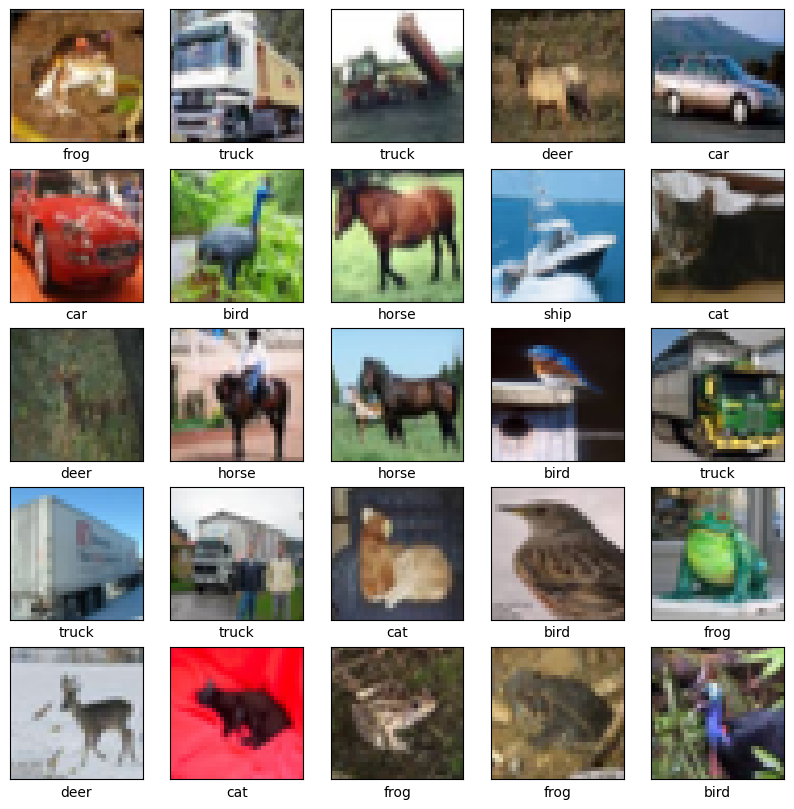

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - accuracy: 0.2816 - loss: 1.9099 - val_accuracy: 0.4976 - val_loss: 1.3727
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 89ms/step - accuracy: 0.5112 - loss: 1.3475 - val_accuracy: 0.5844 - val_loss: 1.1627
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.5761 - loss: 1.1829 - val_accuracy: 0.6315 - val_loss: 1.0362
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6193 - loss: 1.0779 - val_accuracy: 0.6349 - val_loss: 1.0198
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.6544 - loss: 0.9951 - val_accuracy: 0.6599 - val_loss: 0.9583
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.6797 - loss: 0.9172 - val_accuracy: 0.6746 - val_loss: 0.9231
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.7014 - loss: 0.8565 - val_accuracy: 0.7021 - val_loss: 0.8553
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 95ms/step - accuracy: 0.7182 - loss: 0.8112 -

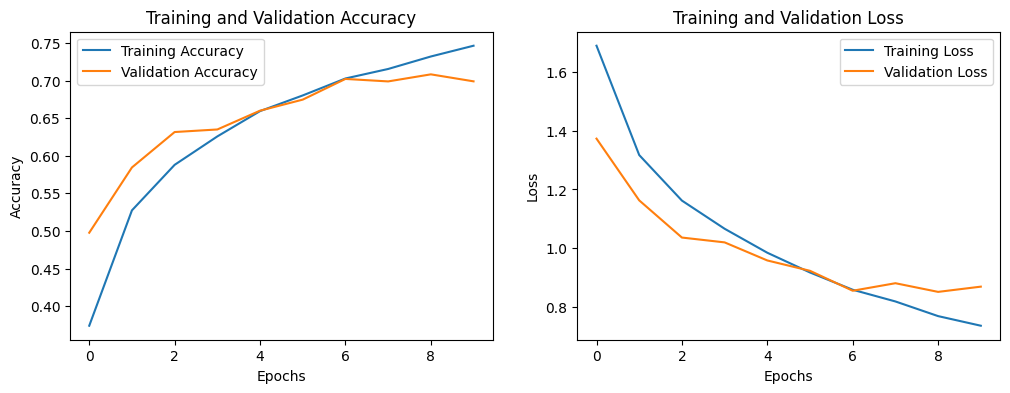

In [ ]:
# Assignment-3 Immage Classification
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Step 2: Load and preprocess the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a scale of 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Visualize some sample images
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i].argmax()])
plt.show()

# Step 4: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Step 5: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Step 7: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# Step 8: Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
